<a href="https://colab.research.google.com/github/PriyankaAdimulam12/Python_Intro/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection we have imported train_test_split
from sklearn import metrics
#from sklearn import preprocesing
from sklearn.metrics import classification_report

In [3]:
#Loading the data set
claimants = pd.read_csv("claimants.csv")
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
claimants.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0


In [5]:
#here as u can see there are null value..so what we will do is IMPUTATION..
#means replacing the null vales with some other value..

In [6]:
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


<Axes: xlabel='ATTORNEY', ylabel='CLMAGE'>

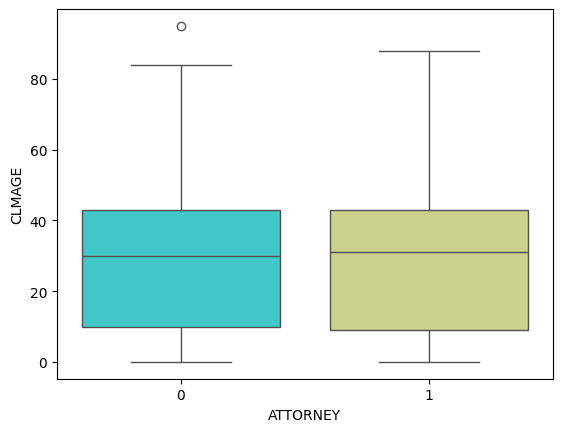

In [8]:
import warnings
warnings.filterwarnings("ignore")

sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="rainbow")
#attorney has 2 categories,0 means he is gng to  consult a lawyer & 1 means he is not gng to consult a lawyer..



In [9]:
#here claimats not approchings the lawyer is slighter high i.e 1








#Droping 1st column
claimants.drop(["CASENUM"],inplace=True,axis=1)
#inplace means we are drop the column & after droping ur dataframe is gng to get modified..
#so display the modifiled datframe that we are saying..

In [10]:
#Droping 1st column
claimants.drop(["CASENUM"],inplace=True,axis=1)
#inplace means we are drop the column & after droping ur dataframe is gng to get modified..
#so display the modifiled datframe that we are saying..

In [11]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


<Axes: xlabel='ATTORNEY', ylabel='count'>

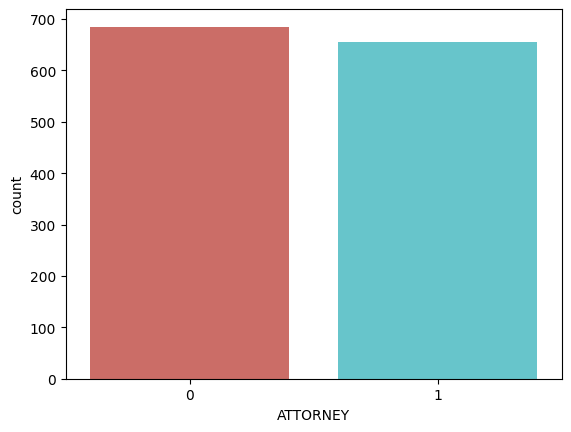

In [12]:
sb.countplot(x="ATTORNEY",data=claimants,palette="hls") #its gng to count hw many observations are there in these 2 categeries...
#so we have slightly more customers who is gng to consult the lawyer..

In [13]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR)
#so here 1means person having Insurance & 0 means person not having Insurance..
#and 585 customers consult lawyer & 594 customers not gng to consult lawyer

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


<Axes: xlabel='ATTORNEY'>

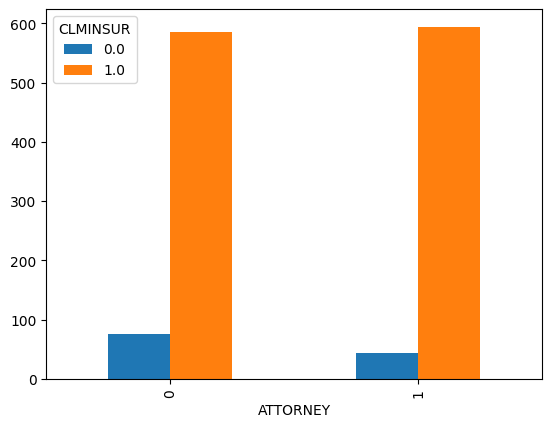

In [14]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")
#above discused thing is represented in through visualization,i.e barchart

<Axes: xlabel='SEATBELT', ylabel='count'>

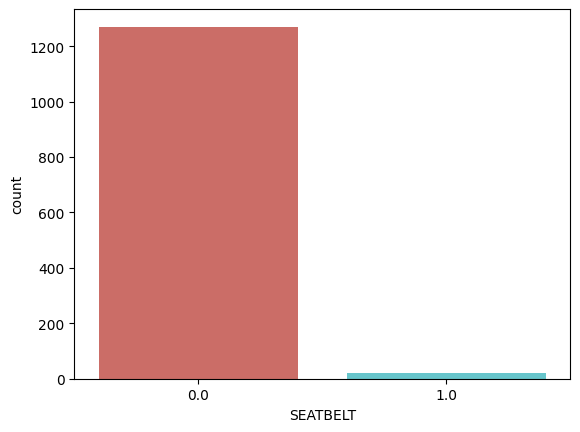

In [15]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
#CUSTOMERS WEARING SEAT BELT ARE MORE..

<Axes: xlabel='CLMINSUR', ylabel='count'>

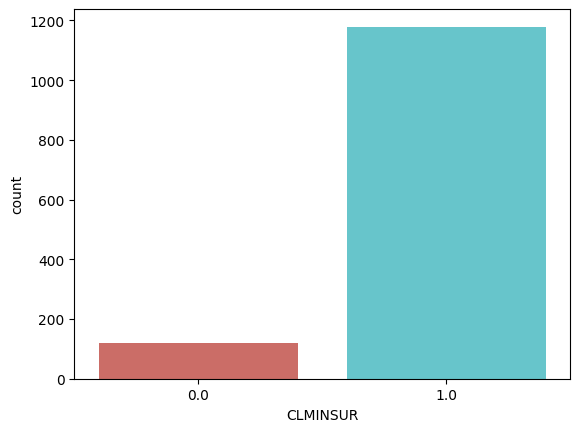

In [16]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")
#most of them having insurance..

<Axes: xlabel='SEATBELT'>

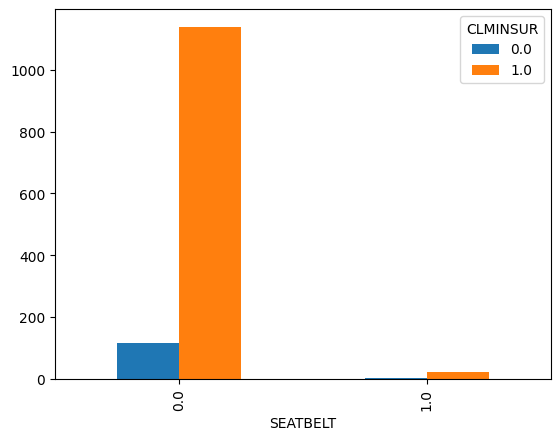

In [17]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

<Axes: xlabel='CLMSEX', ylabel='count'>

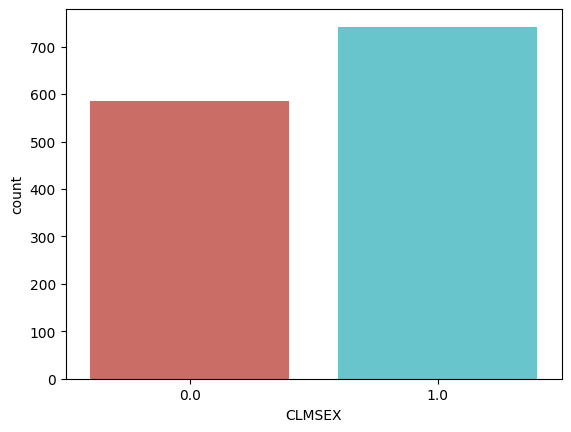

In [18]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")
#most are female..

<Axes: xlabel='CLMSEX'>

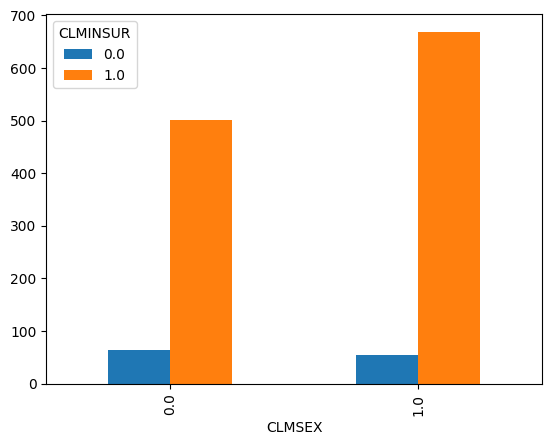

In [19]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")

In [20]:
claimants.isnull().sum()

,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0


In [21]:
#we have null values..replac with imputation..

In [22]:
claimants["CLMSEX"].fillna(1,inplace=True)
claimants["CLMINSUR"].fillna(1,inplace=True)
claimants["SEATBELT"].fillna(0,inplace=True)

In [23]:
claimants.CLMSEX.mode()
claimants.CLMINSUR.mode()
claimants.SEATBELT.mode()
claimants.CLMAGE.mean()

np.float64(28.414422241529106)

In [24]:
claimants.CLMAGE.fillna(28.4144,inplace=True)
#climage mean is 28.4144

In [25]:
claimants.isnull().sum()

,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0


# Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
claimants.shape

(1340, 6)

In [27]:
X=claimants.iloc[:,[1,2,3,4,5]] # X means ur independent variable
Y=claimants.iloc[:,0] #Y means ur Target variable(attorney)
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [28]:
classifier.coef_ #coefficeints of features

array([[ 0.31687491,  0.5055026 , -0.52613497,  0.00660526, -0.32241077]])

In [29]:
classifier.predict_proba(X) #probability values..

array([[9.99974053e-01, 2.59465658e-05],
       [4.95419392e-01, 5.04580608e-01],
       [4.25079704e-01, 5.74920296e-01],
       ...,
       [2.85388975e-01, 7.14611025e-01],
       [6.86705235e-01, 3.13294765e-01],
       [3.38824277e-01, 6.61175723e-01]])

In [30]:
#here 0.99% chance is there that customrs are gng to consult the lawyer..

In [31]:
y_pred=classifier.predict(X)
claimants["y_pred"]=y_pred #these are all predicted values..
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1
1336,0,1.0,1.0,0.0,46.0000,3.705,0
1337,1,1.0,1.0,0.0,39.0000,0.099,1
1338,0,1.0,0.0,0.0,8.0000,3.177,0


In [32]:
y_pred_df=pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df=pd.concat([claimants,y_pred_df],axis=1)#SEE CAREFULLY OBSERVE THE 0 &1,
#WHICH VALUE HAS HIGHER ONE..THAT COLUMN IS REPRESENTED IN Y_PRED
new_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.0000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.0000,0.891,1,0.495419,0.504581
2,1,0.0,1.0,0.0,5.0000,0.330,1,0.425080,0.574920
3,0,0.0,1.0,1.0,31.0000,0.037,1,0.489496,0.510504
4,1,0.0,1.0,0.0,30.0000,0.038,1,0.363263,0.636737
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1,0.406778,0.593222
1336,0,1.0,1.0,0.0,46.0000,3.705,0,0.549460,0.450540
1337,1,1.0,1.0,0.0,39.0000,0.099,1,0.285389,0.714611
1338,0,1.0,0.0,0.0,8.0000,3.177,0,0.686705,0.313295


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[435, 250],
       [147, 508]])

In [34]:
pd.crosstab(y_pred,Y)

ATTORNEY,0,1
row_0,,
0,435,147
1,250,508


In [35]:
#type(y_pred)
accuracy=sum(Y==y_pred)/claimants.shape[0]
accuracy

0.7037313432835821

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [42]:
from sklearn.metrics import roc_auc_score #finding out area under curve
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

np.float64(0.7053045077171672)

so ur accuracy for logistic regression is 70%

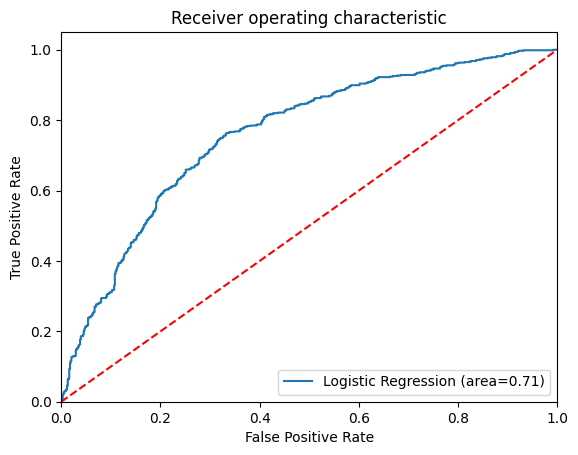

In [46]:
fpr,tpr,thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)'% Logit_roc_score) #plot roc curve
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [47]:
y_prob1 =pd.DataFrame(classifier.predict_proba(X)[:,1])
y_prob1

,0
0,0.000026
1,0.504581
2,0.574920
3,0.510504
4,0.636737
...,...
1335,0.593222
1336,0.450540
1337,0.714611
1338,0.313295


In [48]:
import statsmodels.api as sm

In [49]:
logit=sm.Logit(Y,X)

In [50]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.609294
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                            4
Date:                Tue, 23 Sep 2025   Pseudo R-squ.:                  0.1207
Time:                        14:26:03   Log-Likelihood:                -816.45
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 2.515e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.3005      0.116      2.591      0.010       0.073       0.528
CLMINSUR       0.4167      0.124      3.364      0.001       0.174       0.660
SEATBELT      -0.6828      0.522     -1.308      0.191      -1.706       0.341
CLMAGE         0.0059      0.003      1.951      0.051   -2.58e-05       0.012
LOSS          -0.3262      0.029    -11.234      0.000      -0.383      -0.269
==============================================================================
"""

In [51]:
fpr

array([0.        , 0.        , 0.        , 0.00145985, 0.00145985,
       0.00291971, 0.00291971, 0.00437956, 0.00437956, 0.00583942,
       0.00583942, 0.00729927, 0.00729927, 0.00875912, 0.00875912,
       0.01021898, 0.01021898, 0.01167883, 0.01167883, 0.01313869,
       0.01313869, 0.01459854, 0.01459854, 0.01605839, 0.01605839,
       0.01605839, 0.01605839, 0.01605839, 0.01605839, 0.01751825,
       0.01751825, 0.01751825, 0.01751825, 0.0189781 , 0.0189781 ,
       0.02043796, 0.02043796, 0.02189781, 0.02189781, 0.02481752,
       0.02481752, 0.02919708, 0.02919708, 0.03065693, 0.03065693,
       0.03357664, 0.03357664, 0.03357664, 0.0350365 , 0.0350365 ,
       0.03649635, 0.03649635, 0.0379562 , 0.0379562 , 0.03941606,
       0.03941606, 0.04379562, 0.04379562, 0.04525547, 0.04525547,
       0.04671533, 0.04671533, 0.04817518, 0.04817518, 0.04963504,
       0.04963504, 0.05109489, 0.05109489, 0.0540146 , 0.0540146 ,
       0.0540146 , 0.0540146 , 0.05547445, 0.05547445, 0.05839

In [52]:
tpr

array([0.        , 0.00152672, 0.00305344, 0.00305344, 0.00763359,
       0.00763359, 0.01984733, 0.01984733, 0.02442748, 0.02442748,
       0.02900763, 0.02900763, 0.03053435, 0.03053435, 0.03206107,
       0.03206107, 0.0351145 , 0.0351145 , 0.04580153, 0.04580153,
       0.06412214, 0.06412214, 0.06564885, 0.06564885, 0.06870229,
       0.07480916, 0.0870229 , 0.09007634, 0.09312977, 0.09312977,
       0.09618321, 0.10076336, 0.10992366, 0.10992366, 0.11603053,
       0.11603053, 0.12671756, 0.12671756, 0.12824427, 0.12824427,
       0.12977099, 0.12977099, 0.14656489, 0.14656489, 0.15114504,
       0.15114504, 0.15267176, 0.15572519, 0.15572519, 0.16030534,
       0.16030534, 0.16183206, 0.16335878, 0.17709924, 0.17709924,
       0.18625954, 0.18625954, 0.19083969, 0.19083969, 0.20152672,
       0.20152672, 0.20763359, 0.20916031, 0.21221374, 0.21221374,
       0.21374046, 0.21374046, 0.21679389, 0.21679389, 0.2259542 ,
       0.23206107, 0.23816794, 0.23816794, 0.23969466, 0.23969

In [57]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
    y_pred=np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y,y_pred, normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                      axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
320,5.285839e-01,0.713433
321,5.250989e-01,0.713433
317,5.325968e-01,0.712687
319,5.293810e-01,0.712687
311,5.392520e-01,0.712687
...,...,...
0,inf,0.511194
1,7.689822e-01,0.511194
548,1.435155e-11,0.492537
549,7.994528e-12,0.491791


In [63]:
from numpy import argmax #we are gng to find out best cutoff value,to improve model performance and accuracy
J = tpr-fpr
ix=argmax(J)
best_thresh=thresholds[ix]
print('Best Threshold =%f' % (best_thresh))

Best Threshold =0.525099


In [61]:
threshold =0.525090
preds = np.where(classifier.predict_proba(X)[:,1]>threshold,1,0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       685
           1       0.69      0.76      0.72       655

    accuracy                           0.71      1340
   macro avg       0.72      0.72      0.71      1340
weighted avg       0.72      0.71      0.71      1340

